# CS 449 Final Project Proposal

Due: April 21, 2023 at 11:59pm

## 1. Names and Net IDs

Tyler Dempski, ted4152
Ryan Philip, rdp4481
Peter Ha, pth1573
Zafir Ansari, zai1630

## 2. Abstract

*Your abstract should be two or three sentences describing the motivation
for your project and your proposed methods.*


Our project aims to use PyTorch Long Short Term Memory Networks (LSTM's) to learn patterns in stock market activity and predict the future direction of the stock's price. We will enhance the utility of our model by increasing the range of time over which the model can make predictions as well as allowing for different types of securities. This model will predict a binary classification for the stock over a given amount of time (up vs. down) and then be improved to predict specific price points over time.

## 3. Introduction

*Why is this project interesting to you? Describe the motivation for pursuing this project. Give a specific description of your data and what machine learning task you will focus on.*

Financial systems are notoriously unpredictable, and while many people claim they are impossible to predict, others have made careers using trading strategies to profit off of market uncertainties. The latter group suggests it is possible to predict the movement of a security, and therefore a potential for profit exists. The most effective strategies are highly debated and very difficult to intuitively derive. This is well suited for a deep neural network because of their ability to identify the signal in the noise. 

By using deep learning models, we can classify securities based on the degree at which they are expected to increase or decrease in value, and use this information to suggest potential trades. This problem is well suited for a deep learning network, as there is an extremely high volume of data for stock prices spanning 25 years, which can be used for training the model to handle a large range of possible inputs. Additionally, since no objective function has been proven to successfully predict the market's volatility, the heuristic nature of deep learning model optimization is an ideal approach to finding a good solution.

## 4a. Describe your dataset(s)

*List the datasets you plan to use, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used your data, or explain why no one has used your data before.*

Datasets:
1) Kaggle dataset: https://www.kaggle.com/datasets/svaningelgem/nyse-daily-stock-prices?select=ABBV.csv
    - can pull high, low, open, close
    - all data is daily
    - timeseries data (many rows, 4 columns), one page per stock
    - all data is labeled
    - This dataset has not been used on any projects yet. It is a relatively new dataset (created March 14).

>
2) Peter's python script to pull from Yahoo Finance to Pandas df
    - can pull high, low, open, close, volume, and adjusted close as well as a smattering of technical analysis
    - can pull weekly, daily, hourly, and by minute
    - timeseries data (many rows, 14 columns), each row has the stock name as a column
    - all the data is labeled
    - Peter has used this dataset previously to run his own stock market machine learning models.

>
3) Wharton Dataset
    - Currently requesting access.
    - Can access historical S&P 500 components, fundamentals, as well as daily price.
    - Price and quote data (e.g. Open, close, bid/low, ask/high, trade-only)
    - Holding period returns with and without dividends
    - Excess returns and other derived data items
    - Market capitalization, shares outstanding, trading volume, corporate actions
    - Data is labeled, can be output in multiple formats, used by thousands of academics and universities worldwide for research.







## 4b. Load your dataset(s)

*Demonstrate that you have made at least some progress with getting your
dataset ready to use. Load at least a few examples and visualize them
as best you can*

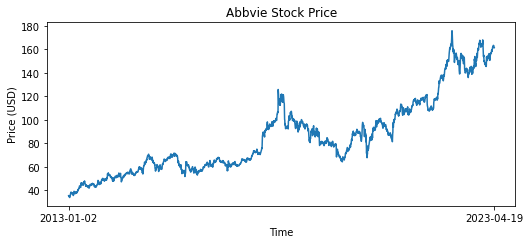

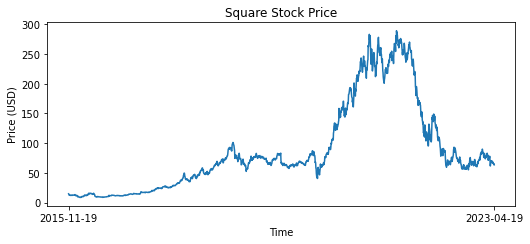

In [2]:
#Kaggle set
import pandas as pd
import matplotlib.pyplot as mpl

def graphStock(path,name):
    mpl.rcParams["figure.figsize"] = [7.5,3.5]
    mpl.rcParams["figure.autolayout"] = True

    stockData = pd.read_csv(path
                         ,usecols=["date","high"])
    mpl.plot(stockData.date,stockData.high)
    mpl.xlabel("Time")
    mpl.ylabel("Price (USD)")
    mpl.title(f'{name} Stock Price')
    mpl.xticks([0,len(stockData.index)-1])
    mpl.show()

graphStock("StockDataDaily/ABBV.csv","Abbvie")
graphStock("StockDataDaily/SQ.csv","Square")






In [22]:
# !pip install yfinance
# !pip install TA-Lib

import pandas as pd
import yfinance as yf
from datetime import date
import time
from talib import abstract
from tqdm import tqdm

# Input Start and End Date
# start = date.today() - timedelta(weeks=104*1)
start = ""
print(start)
end = date.today()
print(end)
t0 = time.time()

# create empty dataframe
stock_final = pd.DataFrame()
tickers = ["ABBV", "SQ"]

# iterate over each symbol
EMA = abstract.Function('ema')
MACD = abstract.Function('macd')
STDDEV = abstract.Function('stddev')
AD = abstract.Function('ad')
NATR = abstract.Function('natr')

# Close, 'Volume', 'EMA', 'MACD','STDDEV', 'AD', 'ADOSC','NATR'
vix = yf.download("^VIX", period="max", progress=True)
vix = vix.rename(columns={"Close": "Volatility"})
vix = vix[["Volatility"]]

for i in tqdm(tickers):

    # print the symbol which is being downloaded
    print(str(tickers.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)

    # download the stock price
    stock = []
    stock = yf.download(i, interval="1d", progress = True)

    # stock = yf.download(i, start=f"{start}", end=f"{end}", interval="1d", progress = True)

    # append the individual stock prices
    if len(stock) == 0:
        None
    else:
        stock = pd.merge(stock, vix, on="Date")
        stock['Name'] = i
        calc_ema = EMA(stock["Close"], timeperiod=26)
        calc_macd = MACD(stock["Close"])
        calc_stddev = STDDEV(stock["Close"])
        calc_ad = AD(stock["High"],stock["Low"],stock["Close"], stock["Volume"])
        calc_natr = NATR(stock["High"],stock["Low"],stock["Close"])
        stock["EMA"] = calc_ema
        stock["MACD"] = calc_macd[0]
        stock["STDDEV"] = calc_stddev
        stock["AD"] = calc_ad
        stock["NATR"] = calc_natr
        stock["Target"] = stock["Close"].shift(periods=-7) # 7 time periods ago

        stock_final = stock_final.append(stock, sort=False)

t1 = time.time()

total = t1 - t0

stock_final.tail(30)
# stock_final.to_csv('ABBVSQ.csv')


2023-04-20
[*********************100%***********************]  1 of 1 completed

  0%|          | 0/2 [00:00<?, ?it/s]


[*********************100%***********************]  1 of 1 completed

<ipython-input-22-c313439d1eaa>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock, sort=False)
 50%|█████     | 1/2 [00:00<00:00,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

<ipython-input-22-c313439d1eaa>:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_final = stock_final.append(stock, sort=False)
100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

,Open,High,Low,Close,Adj Close,Volume,Volatility,Name,EMA,MACD,STDDEV,AD,NATR,Target
Date,,,,,,,,,,,,,,
2023-03-09,77.820000,79.620003,73.500000,73.800003,73.800003,12475200,22.610001,SQ,77.109622,0.204034,2.584433,8.145084e+08,4.987822,74.500000
2023-03-10,70.610001,73.580002,68.470001,71.010002,71.010002,18383100,24.799999,SQ,76.657798,-0.313935,3.473379,8.144005e+08,5.349666,77.459999
2023-03-13,70.000000,71.099998,67.250000,69.459999,69.459999,14357400,26.520000,SQ,76.124628,-0.839821,3.507200,8.165261e+08,5.474309,72.650002
2023-03-14,71.675003,73.860001,71.400002,73.629997,73.629997,13136700,23.730000,SQ,75.939841,-0.909620,2.894359,8.272064e+08,5.222242,61.880001
2023-03-15,72.440002,74.139999,71.669998,74.070000,74.070000,9832200,26.139999,SQ,75.801334,-0.918839,1.835065,8.364813e+08,5.058611,60.680000
2023-03-16,76.120003,76.500000,73.809998,75.089996,75.089996,11453800,22.990000,SQ,75.748642,-0.834224,2.087872,8.359277e+08,4.889359,64.400002
2023-03-17,74.945000,75.230003,73.089996,73.980003,73.980003,9756200,25.510000,SQ,75.617632,-0.846970,1.954447,8.342865e+08,4.814859,63.759998
2023-03-20,73.389999,75.639999,72.690002,74.500000,74.500000,10704500,24.150000,SQ,75.534844,-0.805823,0.501541,8.367177e+08,4.722572,66.489998
2023-03-21,75.839996,77.970001,75.720001,77.459999,77.459999,10458700,21.379999,SQ,75.677448,-0.528276,1.281639,8.424351e+08,4.537652,68.489998


## 4c. Small dataset

*Many deep learning datasets are very large, which is helpful for training powerful models but makes debugging difficult. For your update, you will need to construct a small version of your dataset that contains 200-1000 examples and is less than 10MB. If you are working with images, video, or audio, you may need to downsample your data. If you are working with text, you may need to truncate or otherwise preprocess your data.*

*Give a specific plan for how you will create a small version of one dataset you'll use that is less than 10MB in size. Mention the current size of your dataset and how many examples it has and how those numbers inform your plan.*

Our data size per element is very small, and so there are two methods we can use to shrink the total input size, both of which we will explore during the update assignment.

One way we can provide a small dataset is to reduce the timeframe. By sampling only the prices over a single year, we can reduce the overall data set size while still producing a result.

Another way we can reduce our size is by only including some securities, rather than the entire market. This reduces the total amount of potential suggestions our model will produce, and thus would also likely improve the speed at which decisions are made.

## 5. Methods

*Describe what methods you plan to use. This is a deep learning class, so you should use deep learning methods. Cite at least one or two relevant papers. What model architectures or pretrained models will you use? What loss function(s) will you use and why? How will you evaluate or visualize your model's performance?*


We plan to use a combination of two different models: LSTM, and Convolutional Neural Network. This is because the combination of these models has been shown to produce exceptional accuracy in predicting stock prices (Kanwal). This follows financial reasoning regarding both models, as the convolutional layers can detect the patterns (commonly cited by successful traders as effective prediction models) and the LSTM models are able to learn about long term dependancies as well as excelling in handling time series data.

It seems clear from the work of Chong et. al that training a model on the market as a whole is ineffective, however accuracy of predictions can improve drastically when only considering the actions of stocks on an individual basis. For this reason, we will be developing a model that will be trained on a single stock and will act on a single stock. This will allow our network to learn valuable information about future movement, instead of being overwhelmed by actions across the market that may not correlate to patterns in the individual stock's motion. We will then expand the capabilities of our model by training additional instances of the same architecture on multiple stocks, and comparing their independent results.

Because we will be training the model on individual stocks, we will divide the stock data by months and distribute these month long segments of data between training, validation, and test sets. We will interleave the distribution to ensure that each subset comprises of a diverse set of months, and does not exlcude any large timeframe. This will allow us to both train the model on a variety of trends across time, but also verify the ability of the model to predict stock values on a variety of scenarios.

The final model we hope to build is a reinforcement learning model that will be able to predict stock prices and make a profit. This model will make hypothetical trades, and its reward will be a function of the profit it makes on a given trade. However, the reward function will not be linear, because we hope to train the model to trade only in low risk situations. The model should be optimized to have consistent but low margin returns over very inconsistent but potentially high returns. This will lead the model to only act on predictions it makes with high confidence. The punishment for the model will simply be the loss that its investments return in the same manner as the profits. 



## 6. Deliverables

*Include at least six goals that you would like to focus on over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due in mid-May. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### 6.1 Essential Goals
- (At least two goals here. At least one should involve getting a neural network model running.)

    - We will use an LSTM to predict the direction a stock will move from open to close through binary classification. The potential outputs will be increase or decrease/stay the same. For this, we will use Binary Cross Entropy Loss. Some potential hyper parameters we will use here is the width of the input window, timescale, momentum, number of epochs, learning rate,  train-set start date.

    - Our model will be effective across a variety of different securities (volatile vs stable, ETF vs individual stock, etc.)

### 6.2 Desired Goals
- (At least two goals here. Completing these goals should be sufficient for you to say your project was a success.)

    - We will use another LSTM prediction model to estimate a specific price point for a security. For this, we will use Mean Squared Error Loss. Some potential hyper parameters we will use here is the width of the input window, timescale, momentum, number of epochs, learning rate, train-set start date.

    - Our prediction model will support different timescales for forecasts (hourly, daily, weekly, etc). This will allow the model to recommend holding a position for more than one possible time interval. 



### 6.3 Stretch Goals
- (At least two goals here. These should be ambitious extensions to your desired goals. You can still get full points without completing these.)

    - Implement a reinforcement learning model to allow the model to react dynamically to its own predictions, thus allowing it to evaluate actual market transactions and their returns. This model will use profits and losses as its reward and punishment and will seek to average positve returns over the long run, as compared to maximizing immediate profit. In other words, it will maximize value while reducing risk.
    
    - Combine different data sources that have known to affect stock prices such as short term factors such as economic, political factors and/or long term factors such as earnings growth and change in valuation.

    - We will implement an interactive program that actively trades on a paper trading platform.

    


## 7. Hopes and Concerns

*What are you most excited about with this project? What parts, if any, are you nervous about? For example:*

One concern we have is determining how we will adjust the model to work on multiple stocks. The model needs to understand that some companies have high stock prices and some have lower stock prices (Apple is in the $100s and Ford is in the $10s). 

Another concern we have is figuring out how we will provide a market action based on the confidence of the model. 


We are excited to work on a project that has potential use outside of simply being graded and put on a resume. It is exciting to be implementing state of the art techniques to do something useful, and even more so something that, if refined properly, could turn a profit. Additionally, if this project does show promise, we would love the opportunity to expand upon it over the summer, and make it fully functional. There appears to be significant potential for expanding the capabilities of the model, and we are excited to explore many of these options.

Overall, the most nerve racking part of the project is getting started, however once we get through the initial stages of the project, we expect our concerns about scope and timing to subside.

## 8. References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above.*

Chong, E., Han, C., &amp; Park, F. C. (2017). Deep Learning Networks for Stock Market Analysis and prediction: Methodology, Data Representations, and case studies. Expert Systems with Applications, 83, 187–205. https://doi.org/10.1016/j.eswa.2017.04.030 

Deep Neural Networks for Stock Price Predictions, Guoao, Duan et al. https://ieeexplore.ieee.org/document/9730340

Kanwal, A., Lau, M. F., Ng, S. P. H., Sim, K. Y., &amp; Chandrasekaran, S. (2022). BICUDNNLSTM-1dCNN — a hybrid deep learning-based predictive model for stock price prediction. Expert Systems with Applications, 202, 117123. https://doi.org/10.1016/j.eswa.2022.117123 


